In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Ensure 'Churn' column is properly formatted
df['Churn'] = df['Churn'].astype(int)

# Select relevant numerical columns for clustering
numerical_cols = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 
    'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls'
]

X = df[numerical_cols]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Apply Isomap for dimensionality reduction
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)
df['Isomap1'] = X_isomap[:, 0]
df['Isomap2'] = X_isomap[:, 1]

In [6]:
# Perform hierarchical clustering
n_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
df['Cluster'] = hierarchical_clustering.fit_predict(X_isomap)

In [7]:
# Calculate Customer Lifetime Value (CLV)
df['CLV'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] + df['Intl_Charge']


In [8]:
# Define cluster names based on your analysis
cluster_names = {
    0: 'Potential Low Value Customers',
    1: 'Potential Medium Value Customers',
    2: 'Potential High Value Customers'
}

# Map clusters to descriptive names
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

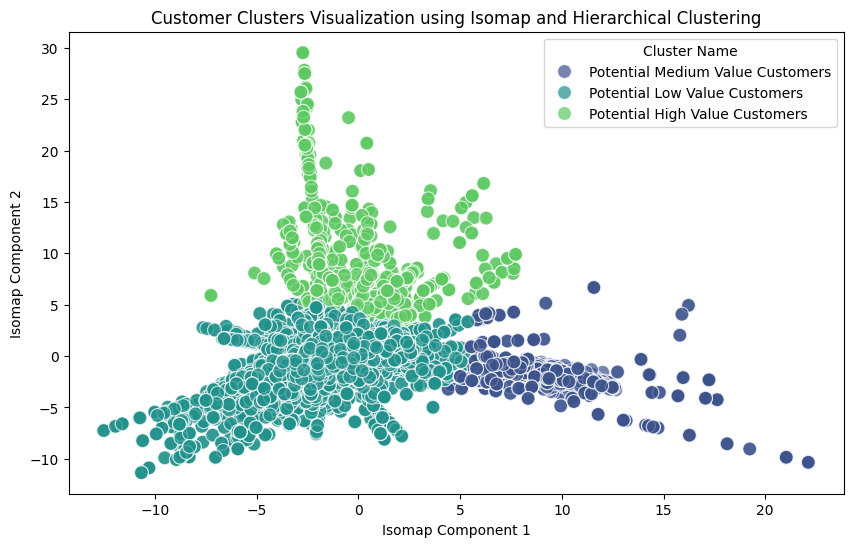

In [9]:
# Visualizing the clusters using Isomap components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Isomap1', y='Isomap2', hue='Cluster_Name', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clusters Visualization using Isomap and Hierarchical Clustering')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.legend(title='Cluster Name', loc='best')
plt.show()

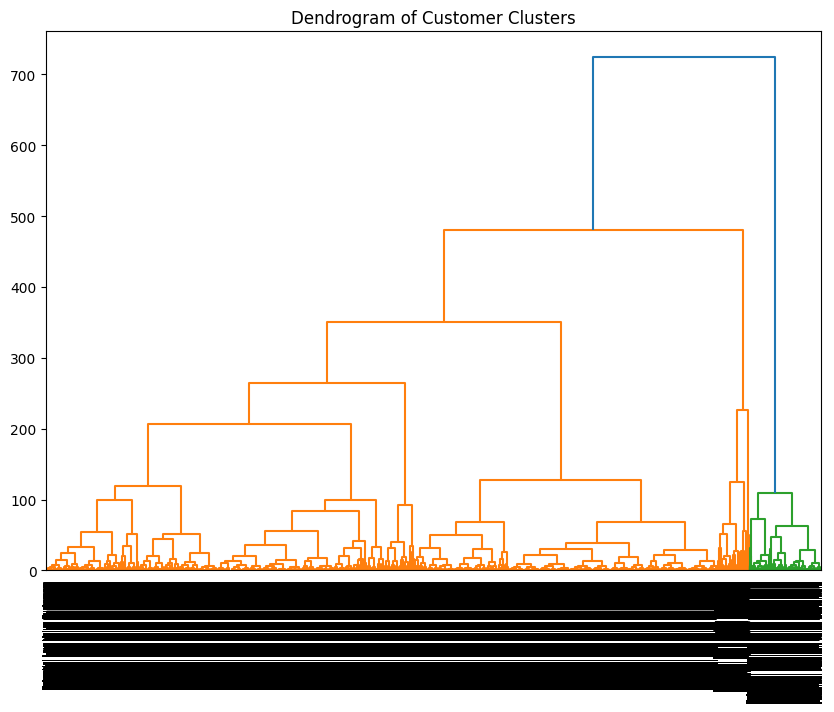

In [10]:
# Visualizing the dendrogram for hierarchical clustering
linked = linkage(X_isomap, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['Cluster_Name'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram of Customer Clusters')
plt.show()

In [11]:
# Cluster analysis: describe statistics and CLV
cluster_analysis = {}
for i in range(n_clusters):
    cluster_name = cluster_names.get(i, f'Cluster {i}')
    cluster_data = df[df['Cluster'] == i][numerical_cols].describe()
    cluster_clv_mean = df[df['Cluster'] == i]['CLV'].mean()
    churn_rate = df[df['Cluster'] == i]['Churn'].mean() * 100  # Convert to percentage
    cluster_analysis[cluster_name] = {
        'Data Description': cluster_data,
        'Average CLV': cluster_clv_mean,
        'Churn Rate': churn_rate
    }

# Count the number of records in each cluster
cluster_counts = df['Cluster_Name'].value_counts()

In [12]:
# Results
print("Cluster Analysis Summary:")
for cluster_name, analysis in cluster_analysis.items():
    print(f"\n{cluster_name}:\n")
    print(analysis['Data Description'])
    print(f"Average CLV: {analysis['Average CLV']:.2f}")
    print(f"Churn Rate: {analysis['Churn Rate']:.2f}%")

print("\nNumber of Records in Each Cluster:")
print(cluster_counts)

Cluster Analysis Summary:

Potential Low Value Customers:

       Account_Length  VMail_Message      Day_Mins     Day_Calls  \
count    27432.000000   27432.000000  27432.000000  27432.000000   
mean       151.949147      12.329688    244.626904    153.228164   
std         98.345075      23.456770     48.845816     87.815045   
min          1.000000       0.000000     62.300000     20.000000   
25%         62.000000       0.000000    222.300000     88.000000   
50%        202.000000       0.000000    232.300000    202.000000   
75%        226.500000      22.000000    282.800000    222.000000   
max        329.000000     211.000000    444.400000    329.000000   

         Day_Charge      Eve_Mins     Eve_Calls    Eve_Charge    Night_Mins  \
count  27432.000000  27432.000000  27432.000000  27432.000000  27432.000000   
mean      41.973041    252.057826    153.452938     24.808602    252.172427   
std       25.707564     36.425318     87.107547      6.711455     35.944549   
min        6